<a id = "intro"></a>

# <u>1. Introduction</u>

Often in the world of retail, marketing and banking, large corporations are interested in gaining an understanding of the behaviours and habits of consumers. This understanding is typically gained through a process known as customer segmentation which is the process of dividing the wider market of customers into groups so that the behaviours and habits of customers within these groups are similar but the habits and behaviours between the groups is different. This process therefore enables large corporations to target specific groups with more relevant and targeted messaging.

The dataset we'll be using for this analysis is obtained from [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata) and the data relate to the usage behaviour of active credit card holders. The data contains 8,950 observations spanning 18 features, namely:

1. Customer ID - Unique ID of the credit card holder
2. Balance - Balance remaining in the account
3. Balance_Frequency - How frequently the balance is updated
4. Purchases - Amount of purchases made
5. Oneoff_Purchases - Maximum spend in one purchase
6. Installment_Purchases - Amount paid in installments
7. Cash_Advance - Cash given by user in advance
8. Purchase_Frequency - How frequently purchases are made
9. Oneoff_Purchases_Frequency - How frequently purchases are paid in one-go
10. Purchases_Installments_Frequency - How frequently purchases are made in installments
11. Cash_Advance_Frequency - How frequently cash is paid in advance
12. Cash_Advance_TRX - Number of transactions made with cash in advance
13. Purchases_TRX - Number of purchase transactions made
14. Credit_Limit - Credit limit for user
15. Payments - Amount of payments made by user
16. Minimum_Payments - Minimum amount of payments made by user
17. PRC_Full_Payment - Percentage of full payment made by user
18. Tenure - Tenure of credit card service for user

In this analysis, we'll firstly import the relevant libraries that will be required along with our data in [section 2](#IDI) followed by data cleaning in [section 3](#DataClean), if required. [Section 4](#EDA) moves on to explore visualisations of the data and we look to examine the relationships between our features before performing dimensionality reduction and standardisation in [section 5](#PrePro) then fitting a clustering algorithm in [section 6](#KMeans) followed by concluding remarks and recommendations in [section 7](#Conc).

<a id = "Imports"></a>

# <u>2. Library & Data Imports</u>

In [51]:
# Inital libraries for data exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for data cleaning/ pre-processing
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

# Libraries for k-means and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px

In [52]:
df = pd.read_csv("CC GENERAL.csv")

<a id = "IDI"></a>

## <u>2.1. Initial Data Information</u>

We can take an initial look at the first 5 rows of the data below,

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


As we can see, it appears as though the variables relating to frequency in the dataset run on a scale of 0 to 1 with 0 corresponding to not frequently at all and 1 corresponding to very frequent. Similarly, given the nature of the data itself, it appears as though we may have a significant number of 0 values which could also potentially suggest we may have some skew in the data.

We can now look to some initial numerical summaries of the numeric features in the data,

In [8]:
df.describe().round(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8949.000,8950.000,8637.000,8950.000,8950.000
mean,1564.475,0.877,1003.205,592.437,411.068,978.871,0.490,0.202,0.364,0.135,3.249,14.710,4494.449,1733.144,864.207,0.154,11.517
std,2081.532,0.237,2136.635,1659.888,904.338,2097.164,0.401,0.298,0.397,0.200,6.825,24.858,3638.816,2895.064,2372.447,0.292,1.338
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,0.000,0.019,0.000,6.000
25%,128.282,0.889,39.635,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,1.000,1600.000,383.276,169.124,0.000,12.000
50%,873.385,1.000,361.280,38.000,89.000,0.000,0.500,0.083,0.167,0.000,0.000,7.000,3000.000,856.902,312.344,0.000,12.000
75%,2054.140,1.000,1110.130,577.405,468.637,1113.821,0.917,0.300,0.750,0.222,4.000,17.000,6500.000,1901.134,825.485,0.143,12.000
max,19043.139,1.000,49039.570,40761.250,22500.000,47137.212,1.000,1.000,1.000,1.500,123.000,358.000,30000.000,50721.483,76406.208,1.000,12.000


As can be seen above, several features in the dataset have a mean and median that vary wildly along with minimum and maximum values that also differ massively. These both point to having highly skewed data along with the potential presence of outliers.

It's important for us to assess whether the data contain any missing values as we need to decide if we should simply drop the rows that contain them or whether to use a technique such as imputation

In [10]:
pd.DataFrame(df.isnull().sum()).rename(columns = {0: "Count of Missing Values"})

,Count of Missing Values
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


It does appear as though we have missing values in the dataset, with the features "Credit_Limit" and "Minimum_Payments" containing 1 & 313 missing values respectively.

<a id = "DataClean"></a>

# <u>3. Data Cleaning</u>

Before progressing any further with our analysis, it's in our best interest to ensure that our data is as useable as possible by dealing with any unecessary features, missing values and outliers.

<a id = "Unimportant"></a>

## <u>3.1. Feature Cleaning</u>

Looking at the dataset above, we see that we have a variable named Cust_ID which corresponds to a unique ID for each credit card holder. Given our objective in this analysis is to cluster customers based on behaviours and habits, the variable doesn't really contain any relevant information and can thus be droppped from the dataset.

In [53]:
df = df.drop(["CUST_ID"], axis = 1)

<a id = "MissVals"></a>

## <u>3.2. Missing Values</u>

The table at the end of [section 2.1](#IDI) demonstrates that we have 314 total missing observations from our dataset with 313 coming from the minimum payments feature and 1 missing value coming from the payments feature.

We can deal with these missing values in two main ways:

<u> 1. Imputation </u> 

* Replace the values with substituted values (eg. with the median value for the column)

<u> 2. Drop the Values </u> 

* Simply remove the observations from the dataset

Using the technique of imputation would be an attractive way to deal with the missing values if they equated to a large proportion of the total observations as simply removing them would result in a loss of a substantial amount of information in the data. However given our missing values only equate to $\approx$ 3.5% of the overall number of observations, we can simply remove them from the dataset.

In [54]:
df = df.dropna()

Now we can re-assess the data to ensure we have removed the missing values,

In [7]:
pd.DataFrame(df.isnull().sum()).rename(columns = {0: "Count of Missing Values"})

,Count of Missing Values
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


As we can see, there are now no missing values in the dataset.

<a id = "Transform"></a>

## <u>3.3. Transformation & Outliers</u>

Given the previous indication of potentially having skewed data and the presence of outliers, it is of interest to think about applying a transformation to the data before going ahead and removing outliers that we have. The boxplots below show each variable in the dataset and how they are distributed

In [55]:
plt.style.use("fivethirtyeight")

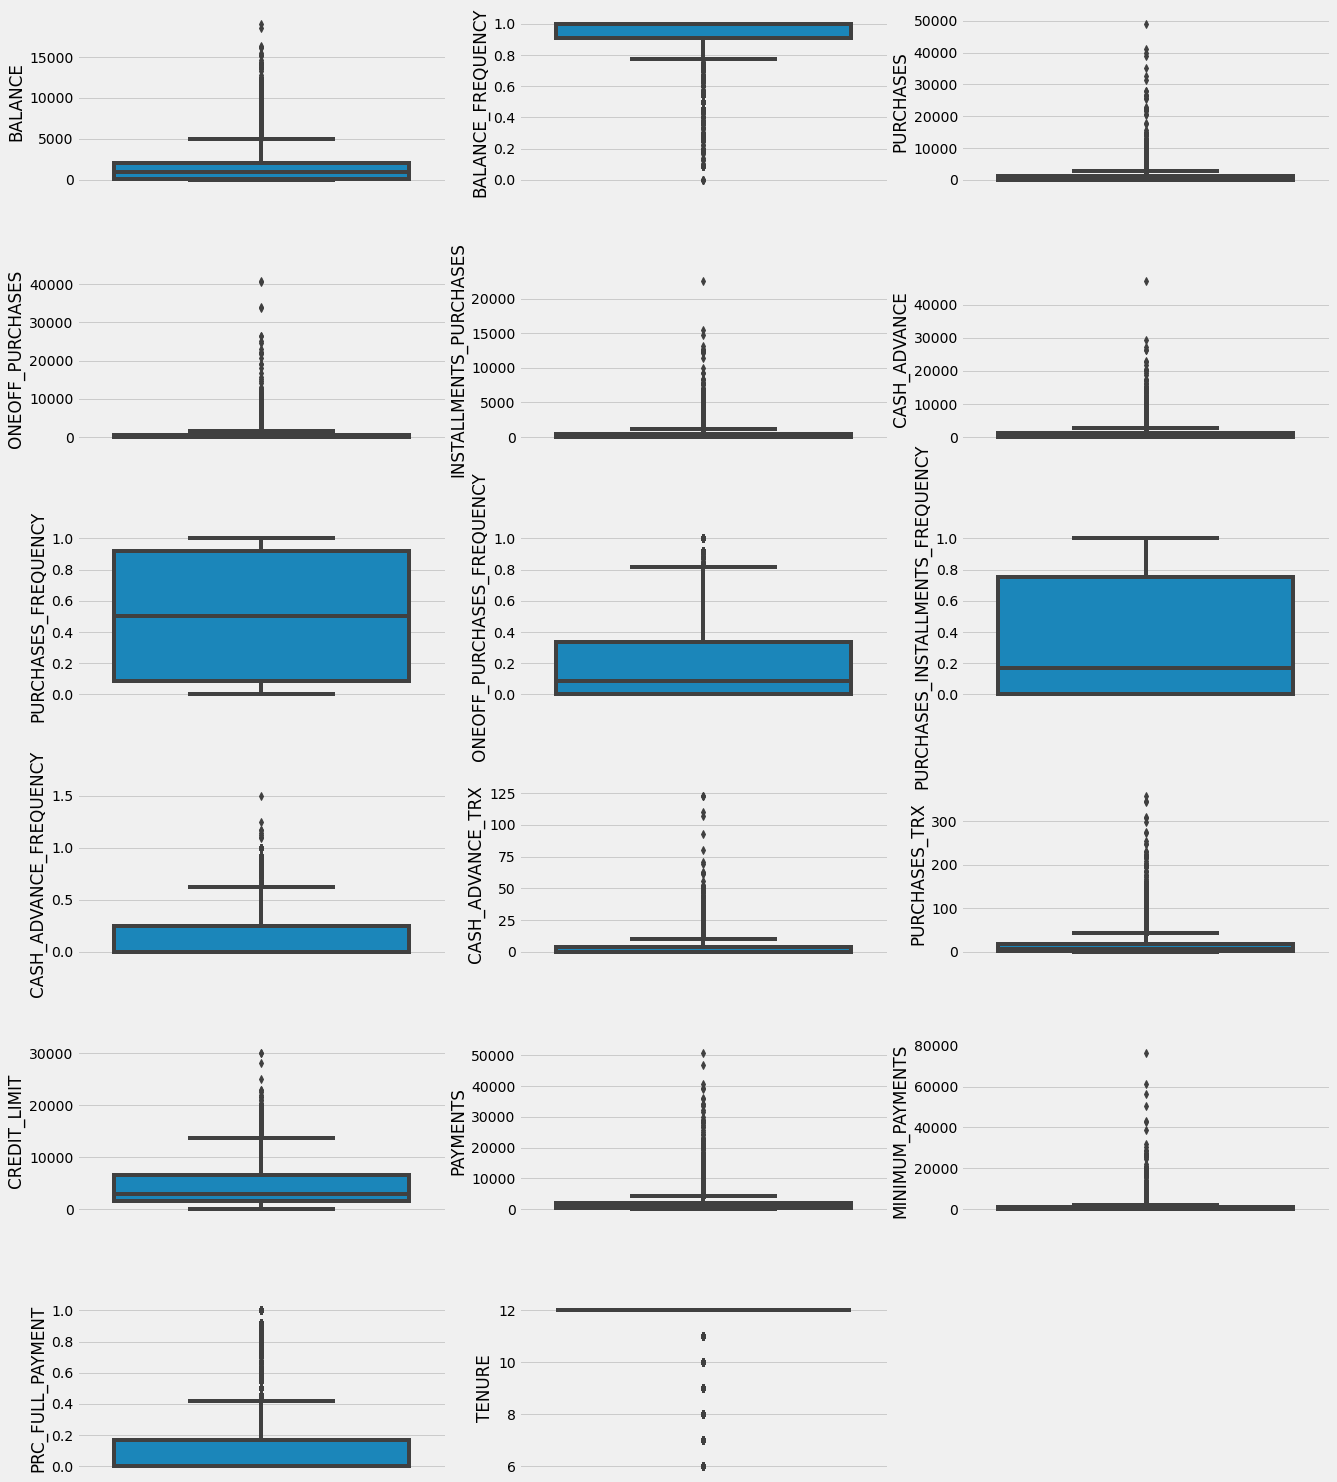

In [38]:
plt.figure(figsize = (20, 25))
plt.subplots_adjust(hspace = 0.5)

for i in range(len(df.columns)):
    
    plt.subplot(6, 3, i + 1)
    
    sns.boxplot(y = df[df.columns[i]], data = df)
    

As is pretty evident from the boxplots, the data are heavily skewed across almost all variables and there is indeed a large presence of outliers aswell. Due to the substantial amount of outliers, removing them as our first step would lead to a massive loss of information from our data so instead we'll apply a Logarithmic transformation beforehand, in particular, $log(x + 1)$ where $x$ is each variable in the dataset. We use this transformation as opposed to a simple $log(x)$ transformation because our data contains many 0 values and $log(0)$ is undefined so adding the constant of 1 allows us to avoid this issue.



In [56]:
for i in df.columns:

    df[i] = np.log(1 + df[i]) 

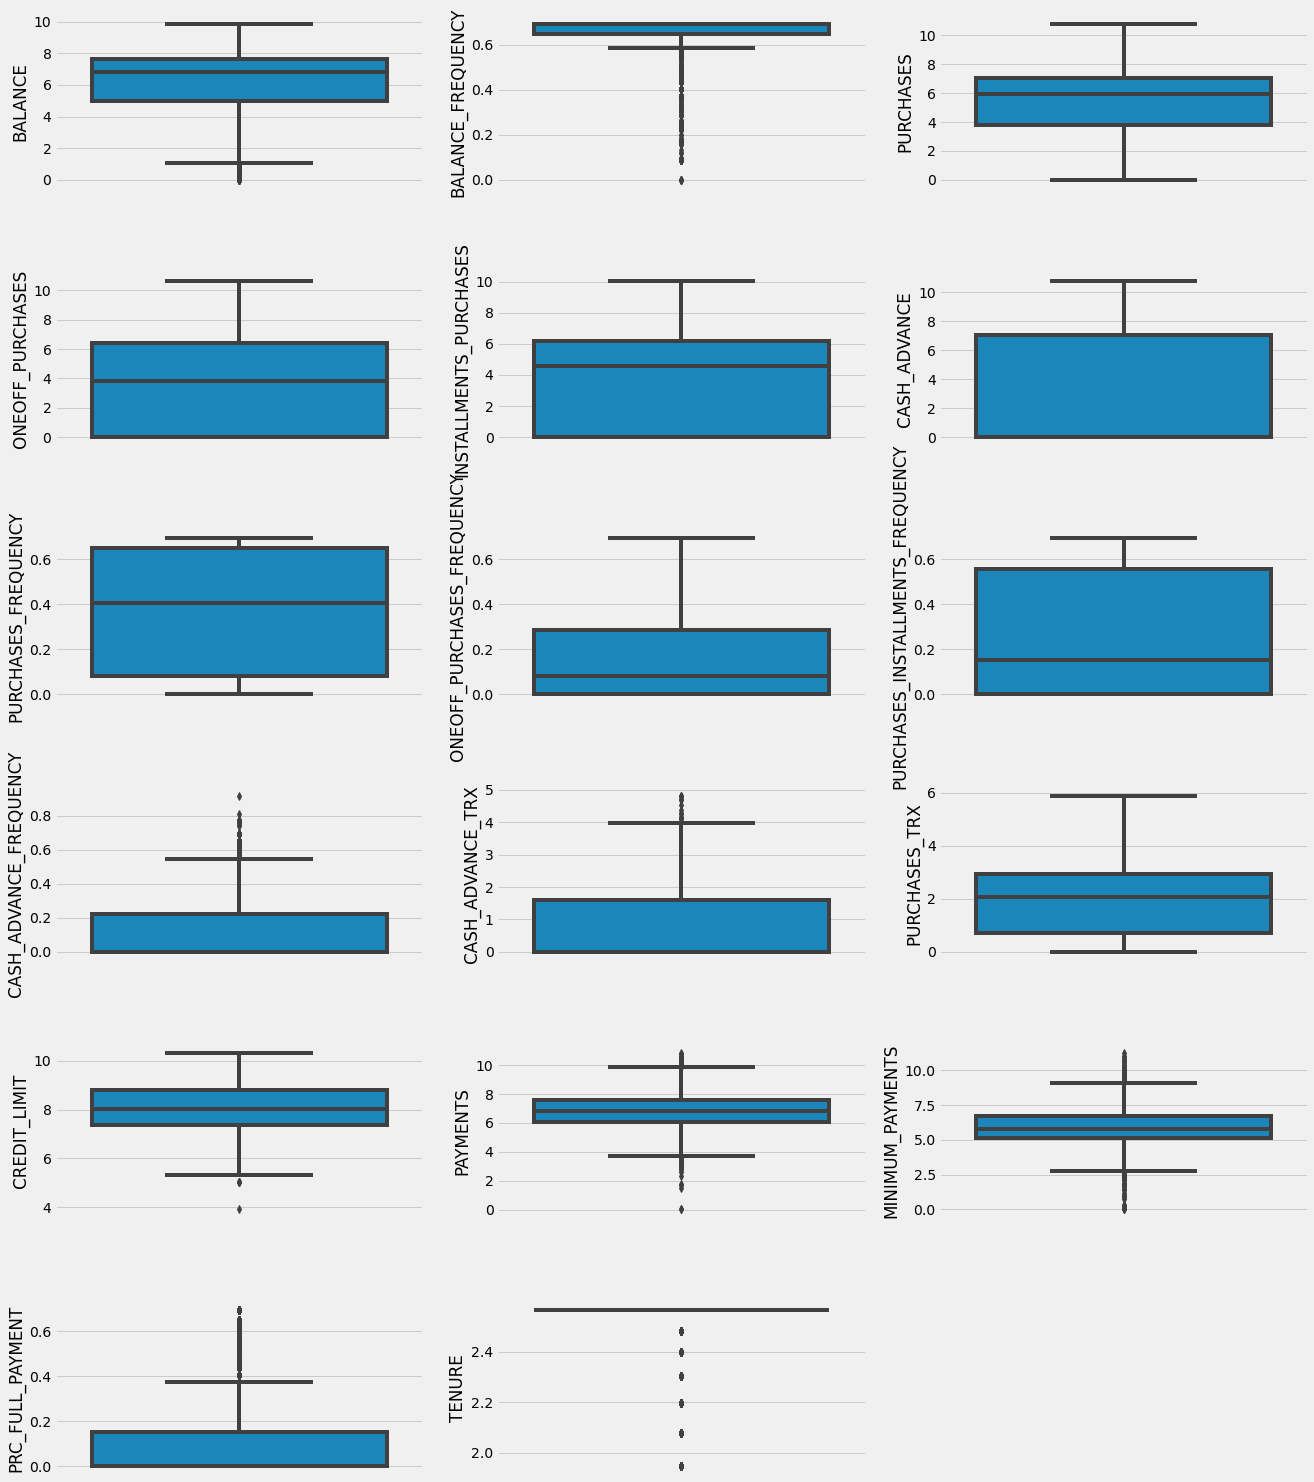

In [40]:
plt.figure(figsize = (20, 25))
plt.subplots_adjust(hspace = 0.5)

for i in range(len(df.columns)):
    
    plt.subplot(6, 3, i + 1)
    
    sns.boxplot(y = df[df.columns[i]], data = df)
    

It does appear as though the applied transformation has had a substantial impact on the skew of the data although we do still see quite a number of outlying observations. We could now move to eliminate the outliers from the dataset however, given the nature of the variables with the greatest skew and outlier presence after transformation, it would likely lead to a huge loss of information from the dataset.

___NOTE: Experimentation showed that if we were to remove observations classed as outliers by the IQR method then that would result in the removal of $\approx$ 4,000 observations which is almost half the dataset___

<a id = "EDA"></a>

# <u>4. Exploratory Analysis</u>

Now that we've dealt with the majority of the data cleaning, we can now look to assess what relationships exist in the dataset. To begin, the heatmap below demonstrates the correlations between all 17 features in the dataset.

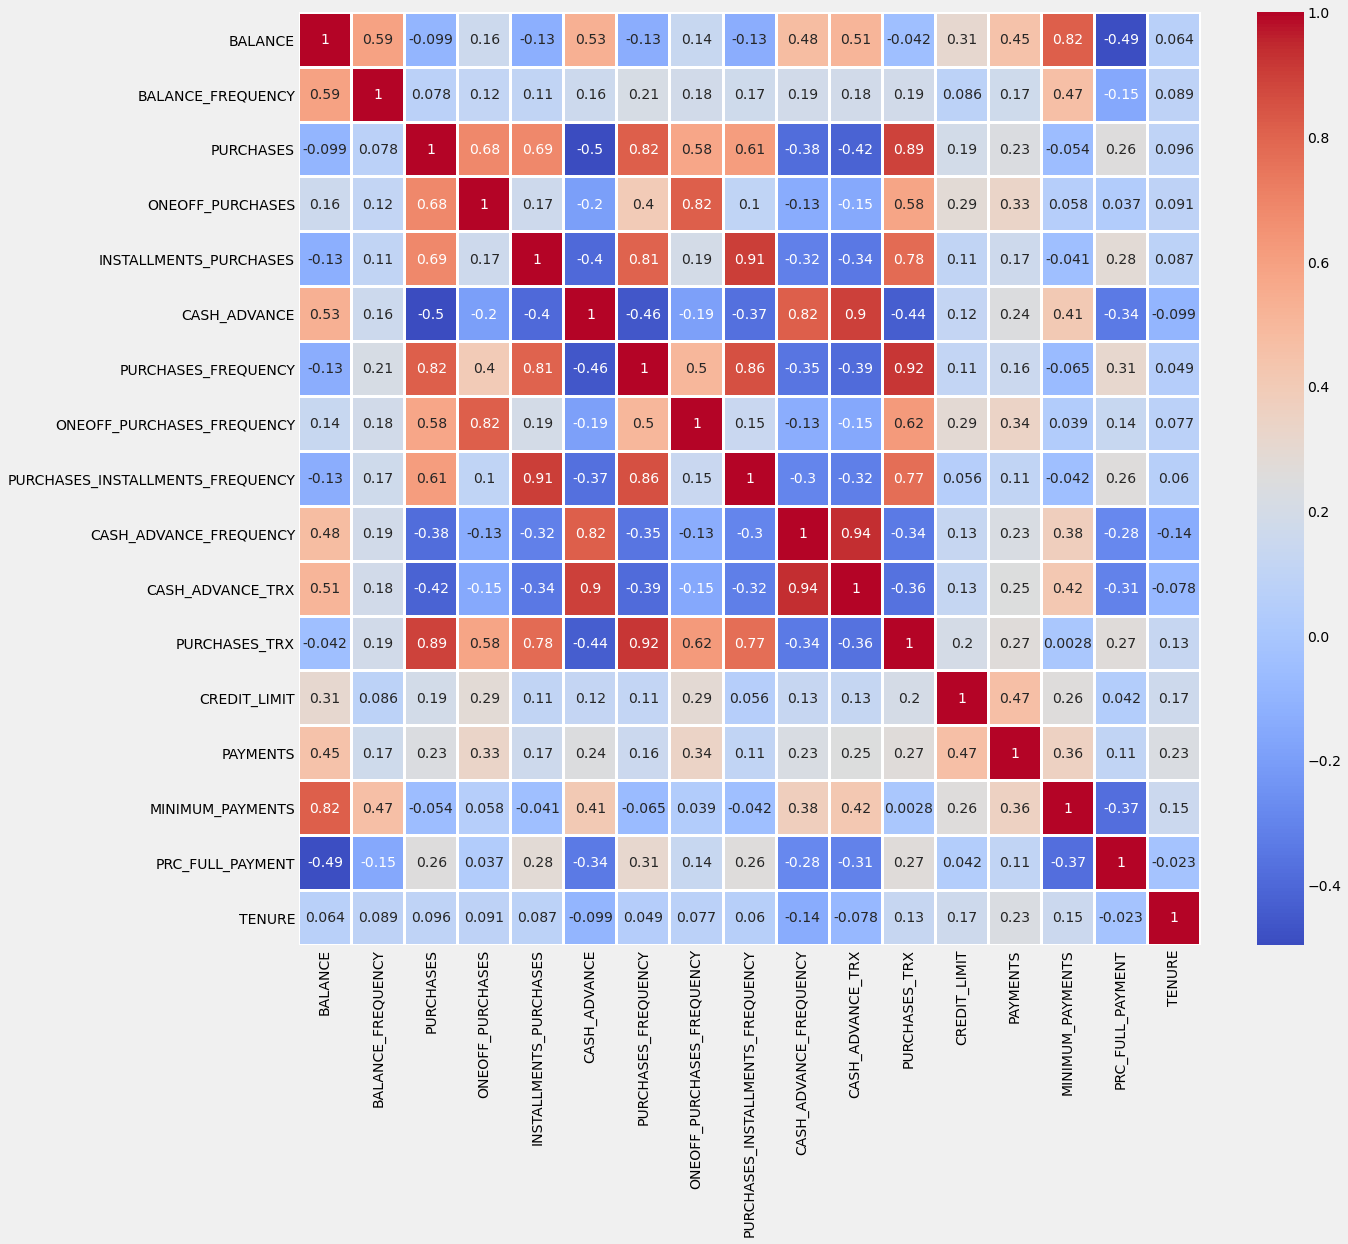

In [53]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidths=2)

The heatmap above demonstrates that there is quite a significant number of highly correlated variables in the dataset. For example, looking at the correlations between variables "CASH_ADVANCE", "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" we see a correlations of 0.9, 0.82 and 0.94 respectively, which makes sense since "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" provide extremely similar information on the credit card users. We see this trend throughout the dataset in the features relating to purchases and one-off purchases suggesting there is quite an issue of multicollinearity in the data.

Given the large number of features in our dataset and the information that they are describing, it isn't much of a surprise that there seems to be a presence of multicollinearity. To deal with it, in [section 5](#PrePro) we'll conduct Principal Component Analysis (PCA) in order to reduce the dimensions of the data and this should eliminate the high correlation in the data.

Before carrying out the process above, we can look to examine some visualisations of relationships in the data, beginning with the plot below of Balance and Minimum Payments,

[Text(0, 0.5, 'Minimum Payments (Log(x+1))'),
 Text(0.5, 0, 'Balance (Log(x+1))')]

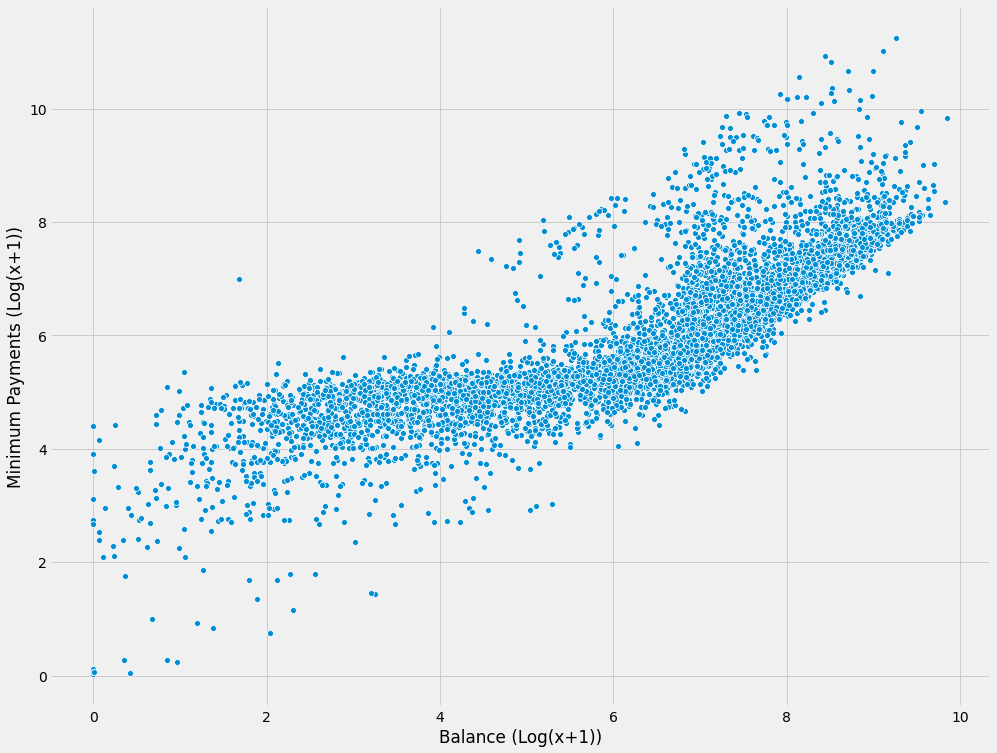

In [11]:
plt.figure(figsize = (15, 12))

plot1 = sns.scatterplot(x = "BALANCE", y = "MINIMUM_PAYMENTS", data = df)
plot1.set(xlabel = "Balance (Log(x+1))", ylabel = "Minimum Payments (Log(x+1))");

The relationship between the two variables, like the correlation heatmap suggests, is overall strongly positive. The relationship appears to have somewhat of a parabolic shape to it where we see a slight plateau in Minimum Payments for those customers whose Balance is on the low to mid range of balance but then a pretty steep increase begins as the Balance gets towards the higher end.

Another interesting relationship in the data relates to Balance and Credit Limit. The plot below demonstrates this,

[Text(0, 0.5, 'Credit Limit (Log(x+1))'), Text(0.5, 0, 'Balance (Log(x+1))')]

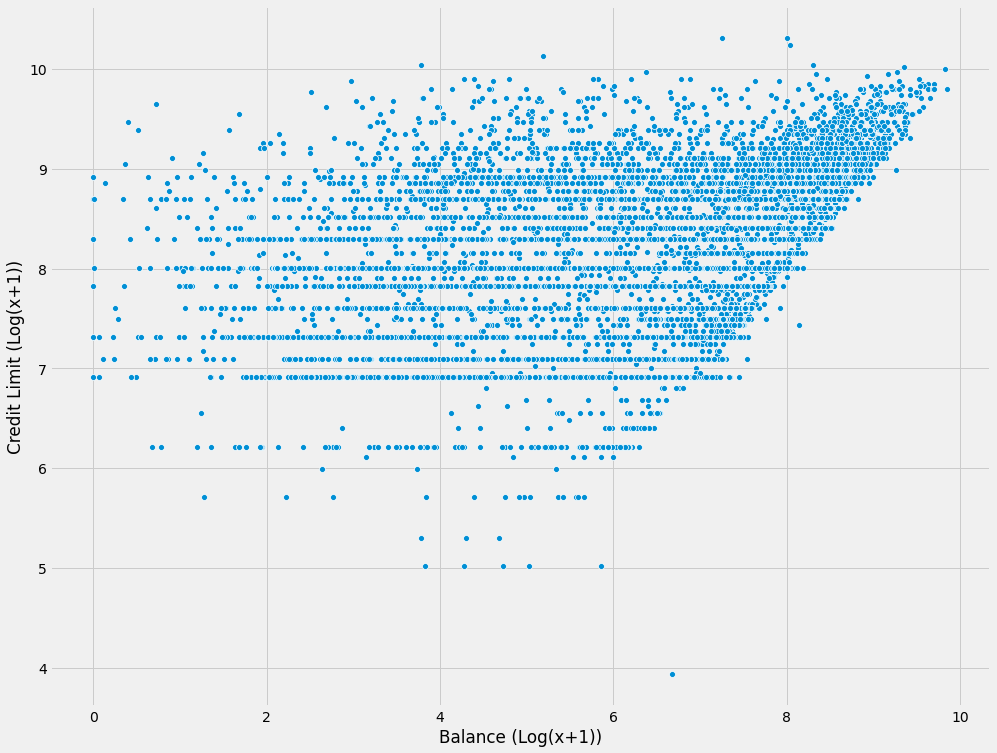

In [12]:
plt.figure(figsize = (15, 12))

plot2 = sns.scatterplot(x = "BALANCE", y = "CREDIT_LIMIT", data = df)
plot2.set(xlabel = "Balance (Log(x+1))", ylabel = "Credit Limit (Log(x+1))");

What is interesting about the relationship is that although it is a positive relationship, it is overall pretty weak. We would expect to see that a user with a higher balance remaining in their account would tend to have a higher overall credit limit.  

<a id = "PrePro"></a>

# <u>5. Data Pre-Processing</u>

Before we progress onto fitting the clustering algorithm, there are a few more steps we'll take in this section to ensure the data are as usable as possible.

## <u>5.1. Standardisation</u>

We look to firstly standardise the variables in the dataset because currently, even after applying the $log(x+1)$ transformation in [section 3.3](#Transform), some of the variables are on different scales and as such those on a larger scale will have a greater impact on the principal component analysis to follow in [section 5.2](#PCA) and the K-Means clustering algorithm to follow in [section 6](#KMeans).

To standardise the data, instead of using a standard scaling of subtracting the mean and dividing by the standard deviation, we use a scaler that subtracts the median and scales according to the interquartile range (IQR). This is done due to the fact that we still have a significant number of outliers in the data and as such these will likely influence the mean which is used typically for standardising data.

In [57]:
scaler = RobustScaler()

scaled_df = scaler.fit_transform(df)

## <u>5.2. Principal Component Analysis (PCA)</u>

Now that the data have been standardised, we can look to perform PCA in order to reduce the dimensions of the data. The idea behind PCA is that we want to find a smaller number of uncorrelated linear combinations of the original variables which explain most of the variation (information) in the data.

We were required to standardise the variables beforehand because PCA can be sensitive to variables on different scales, for example if one variable has a very high variance compared to others, then it'll be over-represented in the PCA.

In [58]:
pca = PCA(n_components = 3)

pca_df = pca.fit_transform(scaled_df)

We can now look to see how applying PCA has affected the shape of the data,

In [16]:
pca_df.shape

(8636, 3)

where we indeed now have 3 principal components that we hope will still explain most of the information that the 17 previous features had. The table below demonstrates how much variation is explained by the 3 principal components,

In [14]:
pd.DataFrame({"Principal Component" : ["1", "2", "3"], 
              "Variance Explained (%)" : [pca.explained_variance_ratio_[0]*100, pca.explained_variance_ratio_[1]*100, pca.explained_variance_ratio_[2]*100]}).set_index("Principal Component")

,Variance Explained (%)
Principal Component,
1,52.090180
2,19.254148
3,9.406352


where as we can see, the $1^{st}$ principal component explains 52.1% of the variation with the $2^{nd}$ explaining 19.25% followed by the $3^{rd}$ principal component explaining 9.41% of the variation. This means that in reducing the dimensions of the data from 17 to 3, we have lost 19.24% of the information in the data. This may seem like a substanial amount of information has been lost however, when considering we've projected 17-dimensional data to 3-dimensional data, it represents an adequate performance.

We can now look at the loadings for each principal components below which describe how the variables in the original dataset correlate with each of the principal components. We look to the direction of the correlation (ie. positive or negative) and also the magnitude which indicates how much of an effect a variable has on that principal component.

In [15]:
pd.DataFrame(pca.components_.T, columns = ["PC 1", "PC 2", "PC 3"], index = df.columns)

,PC 1,PC 2,PC 3
BALANCE,-0.172557,-0.166649,0.208469
BALANCE_FREQUENCY,-0.956248,0.100183,-0.213182
PURCHASES,-0.025176,0.401331,0.412086
ONEOFF_PURCHASES,-0.026498,0.128371,0.265245
INSTALLMENTS_PURCHASES,-0.017032,0.192832,0.114801
CASH_ADVANCE,-0.040444,-0.193403,-0.010719
PURCHASES_FREQUENCY,-0.033648,0.222719,0.141106
ONEOFF_PURCHASES_FREQUENCY,-0.054754,0.220506,0.327080
PURCHASES_INSTALLMENTS_FREQUENCY,-0.027751,0.186572,0.084889
CASH_ADVANCE_FREQUENCY,-0.062165,-0.234447,-0.004949


Beginning with PC 1, we see that across all variables except 1, there are negative correlations with relatively small magnitude suggesting they don't have much of an effect on the component. The one variable that appears to have a substantial effect on PC 1 is BALANCE_FREQUENCY and given the direction of the correlation, we could infer that this component is an indicator of how infrequent a customer updates their account balance. 

Looking to PC 2, we see a slightly different story to PC 1 where many of the correlations are positive and more of the variables have a stronger effect on the principal component itself. PC 2 appears to be most strongly correlated with PRC_FULL_PAYMENT followed by PURCHASES potentially suggesting that this component could be an indicator of customers who make more purchases and pay in full rather than on credit.

PC 3 follows a slighlty similar path to PC 2 where it is mostly affected by PRC_FULL_PAYMENT followed by PURCHASES however, the difference arises in the direction of the relationship with PRC_FULL_PAYMENT where for PC 3 it is negative. We could therefore view this as an indicator of customers who are making more puchases but aren't paying in full and instead using credit more frequently.

<a id = "KMeans"></a>

# <u>6. K-Means Clustering</u>

The completion of the steps above now allow us to move onto fitting our clustering algorithm.

<a id = "theory"></a>

## <u>6.1. The Algorithm</u>

K-Means clustering is a type of clustering analysis which looks to partition the data into K clusters (groups) such that the data points within clusters are similar to one another but dissimilar to data points in other clusters. The algorithm is as follows:

1. Begin with K starting centres

2. For each data observation, assign it to the cluster with the closest centre

3. Re-calculate cluster centres by finding centriods of each clusters' assigned observations

4. Repeat steps 2 & 3 until convergence


We are required to specify the value of K before fitting the algorithm and there are a number of ways in which we can do so but the main ways are via an Elbow plot or the Silhouette Method. 

To choose our value of K, we'll use an Elbow plot first and then assess the silhouette scores for different values of K.

In [59]:
WCSS = []

for k in range(1, 11):
    kmeans_mods = KMeans(n_clusters = k).fit(pca_df)
    WCSS.append(kmeans_mods.inertia_)

We can now examine the plot and choose the optimal number of clusters for our data,

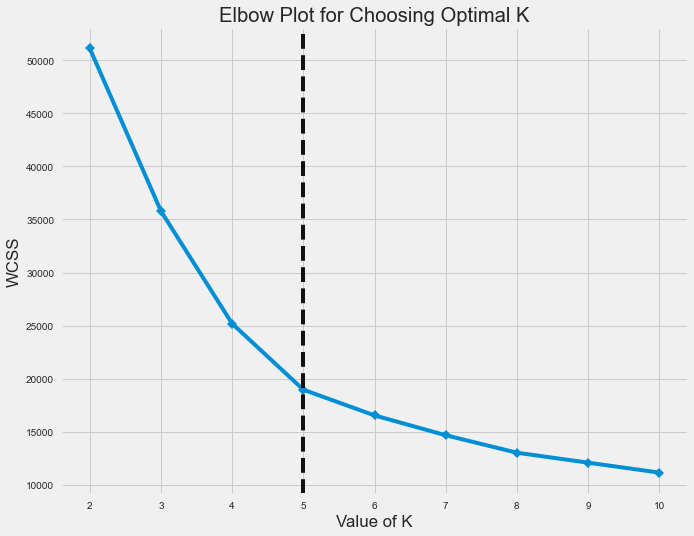

In [17]:
plt.figure(figsize = (10, 8))
KElbowVisualizer(kmeans_mods, timings = False, linewidth = 2).fit(pca_df);
plt.title("Elbow Plot for Choosing Optimal K")
plt.xlabel("Value of K")
plt.ylabel("WCSS");

From the elbow plot above, we can see that the Within Cluster Sum of Squares (WCSS) reduces substantially when we move from 2 clusters to 3, followed by smaller decreases when we move to 4 and 5 clusters before tapering off. The black dashed line is drawn to show where the elbow is and in this case, it suggests the use of 5 clusters for the data.

In [60]:
# Fit K-means for 5 clusters
kmeans_model = KMeans(n_clusters = 5).fit(pca_df)

In [61]:
# Store cluster labels
kmeans_labels = kmeans_model.labels_

# Add cluster labels to original data
cluster_df = df.copy()
cluster_df["Cluster"] = kmeans_labels

<a id = "eval"></a>

## <u>6.2. Cluster Evaluation</u>

We can now move to visualise the clusters to assess how the K-means algorithm has performed. We begin by first visualising the 3 principal components obtained in [section 5.2](#PCA) via the 3D scatter plot below,

In [63]:
fig = plt.figure(figsize = (15, 8))

px.scatter_3d(pca_df, x = pca_df[:,0], y = pca_df[:,1], z = pca_df[:,2], color = cluster_df["Cluster"].astype(str),
             category_orders = {"color" : ["0", "1", "2", "3", "4"]}, title = "3D Scatterplot of Principal Components",
             labels = {"x": "PC 1", "y": "PC 2", "z": "PC 3", "color":"Cluster"})

<Figure size 1080x576 with 0 Axes>

Despite being difficult to make inference from in relation to each principal component, it does appear as though the use of 5 clusters has been successful as we appear to have for quite a bit of seperation between them. It appears as though clusters 1, 2 & 4 sit on the lower end of the values of the $1^{st}$ principal component with cluster 4 sitting higher than clusters 1 & 2 when it comes to the $3^{rd}$ principal component. Cluster 0 seems to have quite a large spread on the $2^{nd}$ and $3^{rd}$ principal components but appears pretty contained on the $1^{st}$ principal component. The spread of cluster 3 seems to be the largest when it comes to the $1^{st}$ principal component but appears pretty even on the $2^{nd}$ and $3^{rd}$ principal components.

Next we can look at multiple variables from the original dataset and assess how they relate to each of the clusters produced by the K-means algorithm. Before we look at the visualisations, we'll revert the data back from the $log(x + 1)$ transformation we applied in [section 3.3](#Transform) to their original scales

In [64]:
for i in df.columns:
    df[i] = (np.exp(df[i])-1)

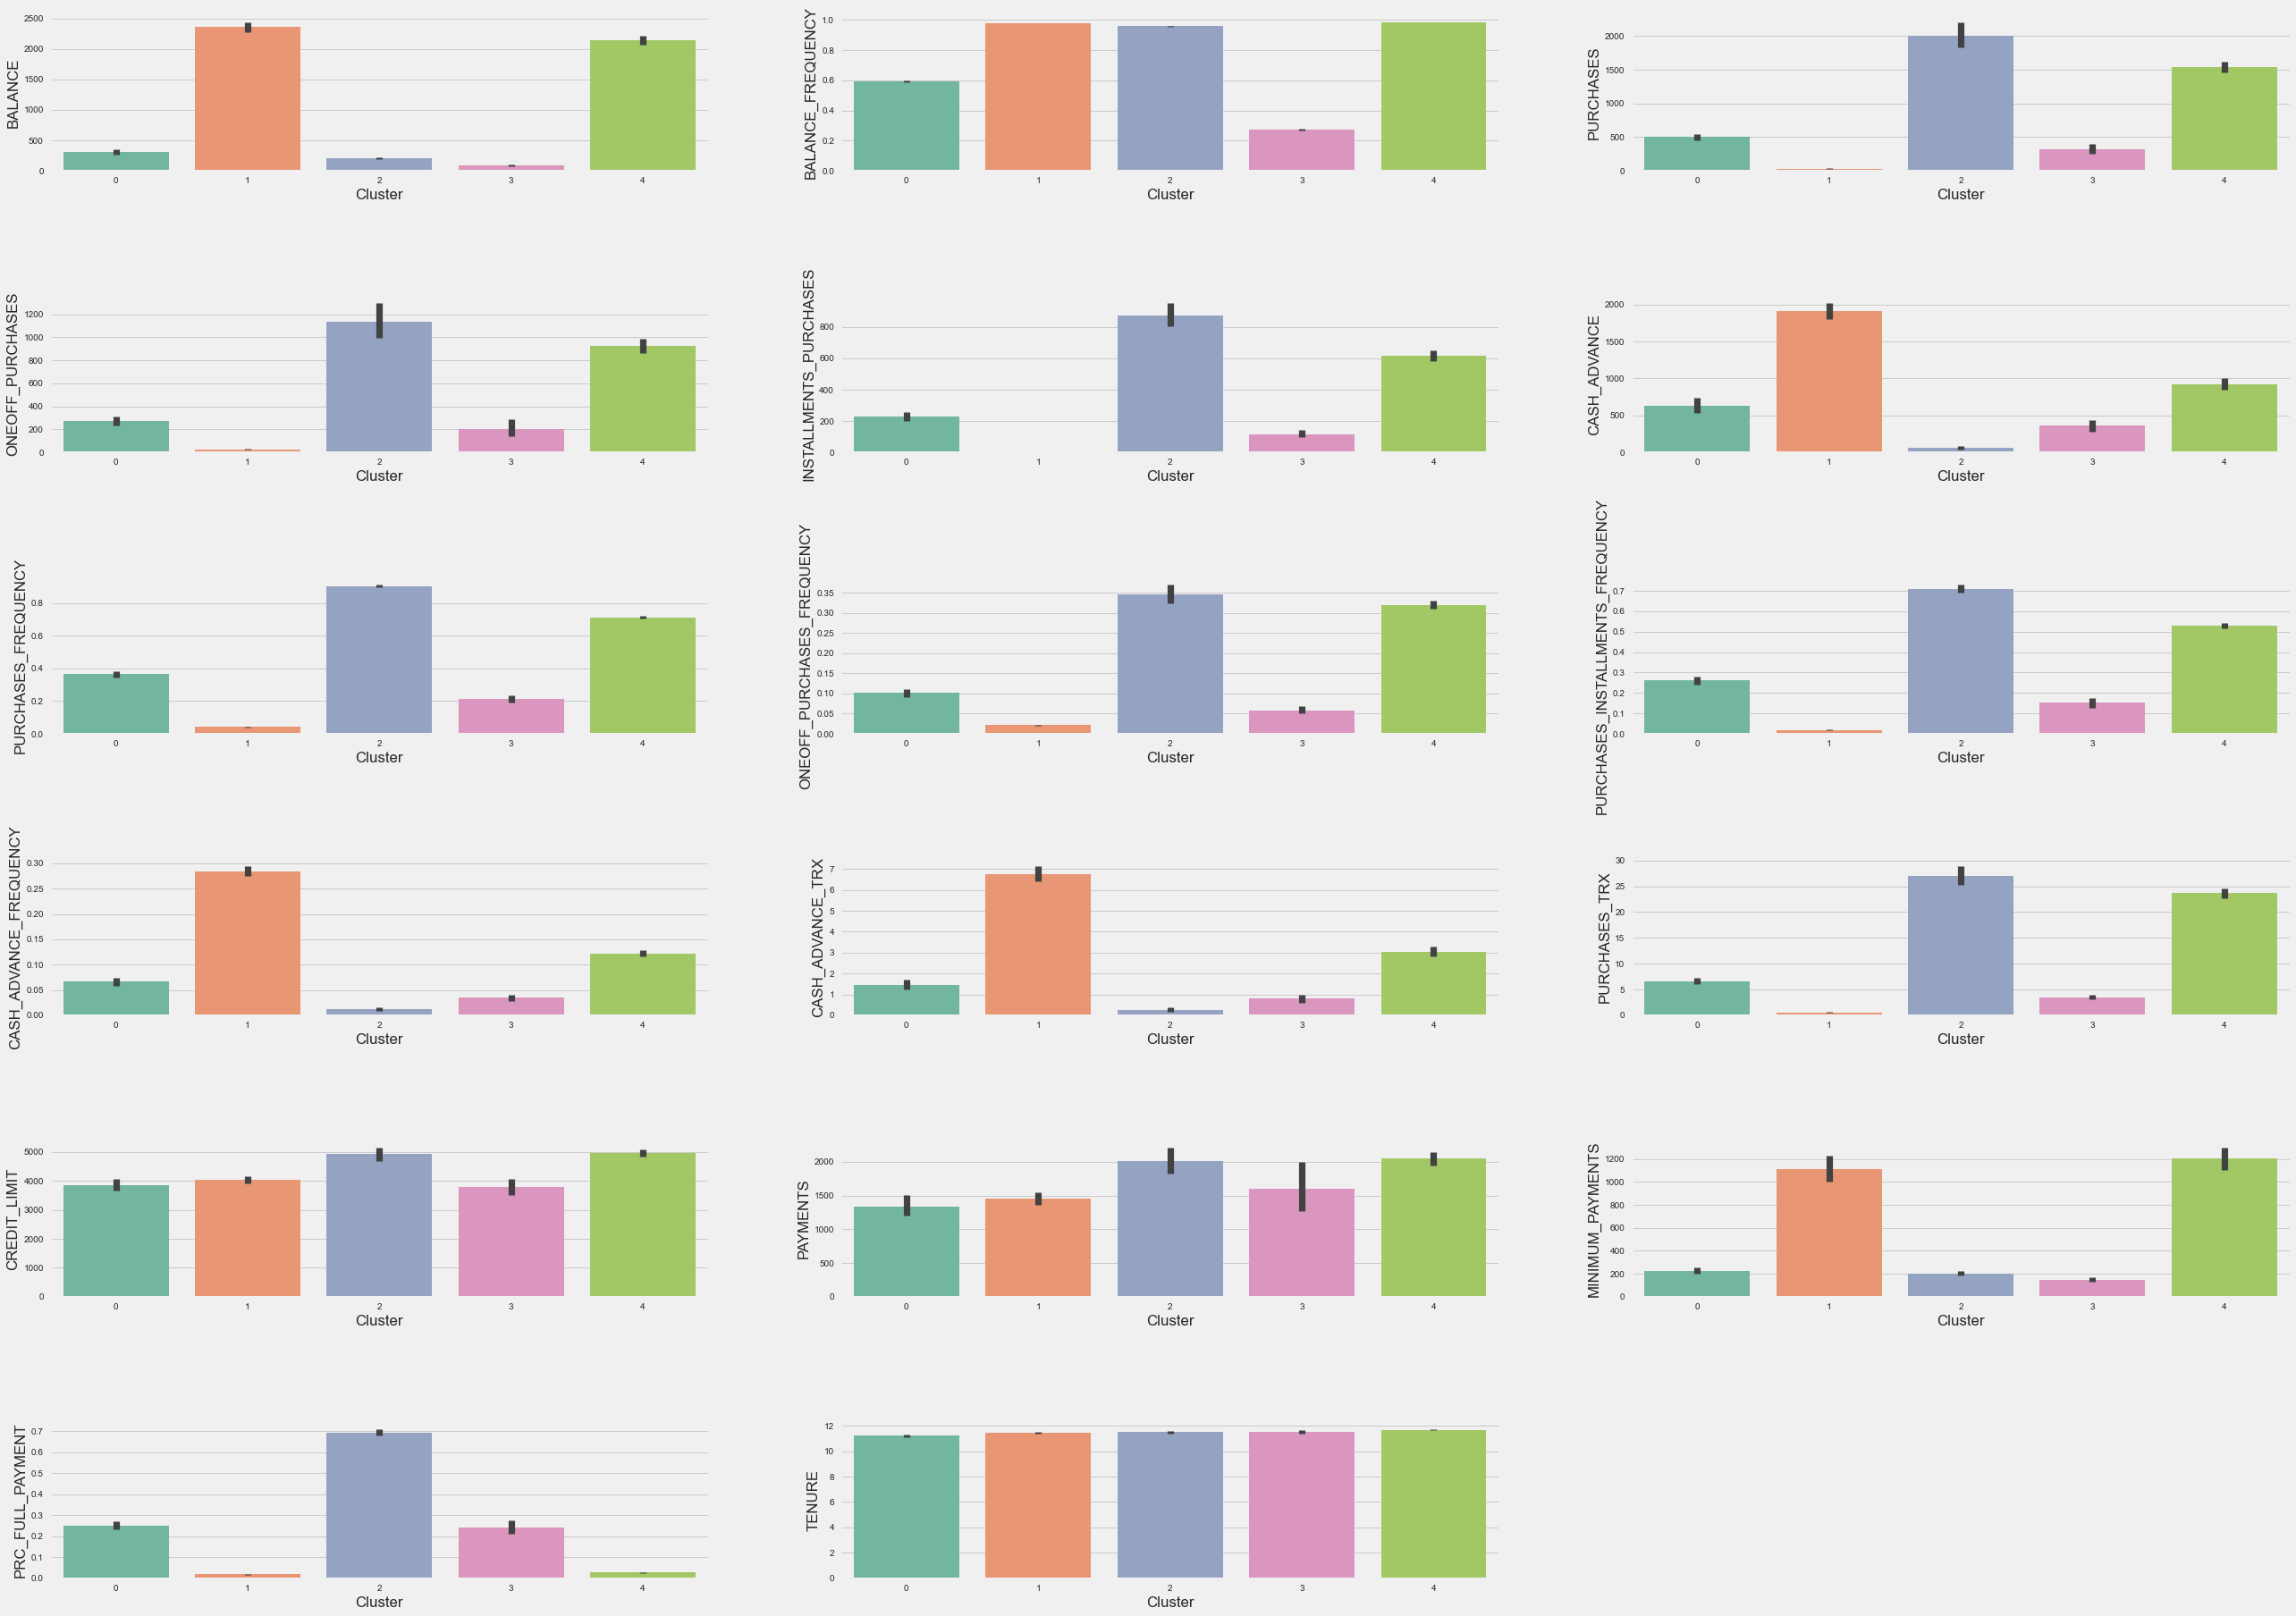

In [50]:
plt.figure(figsize = (40, 30))
plt.subplots_adjust(hspace = 0.8)

for i in range(len(df.columns)):
    
    plt.subplot(6, 3, i + 1)
    
    sns.barplot(x = cluster_df["Cluster"], y = df[df.columns[i]], data = df, palette = "Set2")
    

Looking at the barplots above, there are some interesting observations that we can make. Firstly, we see that across all variables in the original dataset, clusters 2 & 4 appear to be the more prominent than the others while the same could be said for cluster 1 in some cases.

Looking at individual clusters,

* <u>Cluster 0:</u> Appear to be your everyday average customer, having an low/average credit balance, not making too many purchases, paying with a mixture of installments and cash in advance.


* <u>Cluster 1:</u> Appear to be customers with a higher account balance that is updated frequently but who don't make many purchases and when they do, appear to frequently pay with cash in advance.


* <u>Cluster 2:</u> Appear to be customers who make many purchases on a frequent basis that is a mixture of both one-off purchases and purchases paid in installments. Interestingly, these customers pay with cash in advance much less than customers in the other clusters. 


* <u>Cluster 3:</u> These customers very much fall into a similar category as those in cluster 0 but just slightly below in terms of their balance being low and is updated the least frequently but they also don't make much in the way of purchases either.


* <u>Cluster 4:</u> Customers in this cluster display similar characteristics to those in cluster 2 in terms of making frequent purchases although seem to have a higher account balance and pay with cash in advance more frequently and in greater quantity.

<a id = "Conc"></a>

# <u>7. Conclusion</u>

In conclusion, it can be said that the use of the K-mean clustering algorithm was a success in the segmentation of credit card customers. The algorithm suggested the use of 5 clusters for our data which enabled us to determine certain characteristics and behaviours of customers in each cluster where those customers in clusters 0 & 3 appeared to be customers with a low account balance who don't make purchases frequently and who don't spend much when they do. Those customers in clusters 2 & 4 however, seem to be those who make frequent purchases as both one-off payments and in installments where the key difference between the two is that those in cluster 4 appear to have a greater account balance and pay cash in advance more frequently. Customers in cluster 1 can be said to be more similar to those in clusters 0 & 3 but pay more cash in advance.

Overall, the data could be described as being difficult to work with from the massive skews to the large quantity of outliers and high correlations. For future analyses on these data, we could consider alternative methods used to the ones in this analysis for example, another transformation instead of the $log(x + 1)$ transformation used here could be considered along with potentially removing the outliers all together. Another step we could take in future is to consider the removal of variables that display a high correlation to other variables.

